<a href="https://colab.research.google.com/github/jv-mendes07/diabetes_ML/blob/main/previs%C3%A3o_de_diabetes_(projeto_de_classifica%C3%A7%C3%A3o).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Previsão de Diabetes - Projeto de Classificação

#### Neste projeto, usarei um conjunto de dados com várias medidas médicas e físicas de pacientes do sexo feminina que foram diagnosticas com diabetes ou não.

#### O objetivo de tal projeto é treinar um modelo de classificação que prediga com o máximo de precisão possível se uma paciente têm diabetes ou não, ou seja, resolverei um problema de classificação em tal projeto analítico.

In [1636]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Importação de Bibliotecas

In [1637]:
# Importação das principais bibliotecas que serão utilizadas:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importação de Dataset

In [1638]:
# Importação do dataset:

df = pd.read_csv('/content/drive/MyDrive/diabetes.csv')

### Tratamento de Dados

In [1639]:
# Atribuição da quantidade de linhas e de colunas à variáveis distintas:

l, c = df.shape

In [1640]:
# Visualização da quantidade de linhas e da quantidade de colunas:

print(f'Quantidade de Linhas: {l}')
print(f'Quantidade de Colunas: {c}')

Quantidade de Linhas: 768
Quantidade de Colunas: 9


In [1641]:
# Visualização das cinco primeiras linhas do dataset:

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [1642]:
# Formatação textual do nome das colunas, para que todas colunas estejam em minúsculo:

df.columns = [x.lower() for x in df.columns]

In [1643]:
# Nome das colunas:

df.columns

Index(['pregnancies', 'glucose', 'bloodpressure', 'skinthickness', 'insulin',
       'bmi', 'diabetespedigreefunction', 'age', 'outcome'],
      dtype='object')

In [1644]:
# Informações gerais do dataset:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pregnancies               768 non-null    int64  
 1   glucose                   768 non-null    int64  
 2   bloodpressure             768 non-null    int64  
 3   skinthickness             768 non-null    int64  
 4   insulin                   768 non-null    int64  
 5   bmi                       768 non-null    float64
 6   diabetespedigreefunction  768 non-null    float64
 7   age                       768 non-null    int64  
 8   outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [1645]:
# Quantidade de dados ausentes:

df.isna().sum()

pregnancies                 0
glucose                     0
bloodpressure               0
skinthickness               0
insulin                     0
bmi                         0
diabetespedigreefunction    0
age                         0
outcome                     0
dtype: int64

## Dicionário de Dados

* pregnancies - Número de gravidezes
* glucose - Nível de glicose no sangue
* bloodpressure - Medição da pressão sanguínea
* skinthickness - Espessura da pele
* insulin - Nível de insulina no sangue
* bmi - Indicador de massa corporal
* diabetespedigreefunction - Porcentagem de diabetes no sangue
* age - Idade
* outcome - Resultado de diabetes (1 - Sim; 0 = Não)

### Análise Exploratória de Dados (EDA)

#### (1) Qual foi a quantidade de pacientes diagnosticados com diabetes ou não?

In [1646]:
# Verificação da quantidade de pacientes com diabetes e sem diabetes:

df.outcome.value_counts()

0    500
1    268
Name: outcome, dtype: int64

In [1647]:
# Verificação percentual da quantidade de pacientes com diabetes e sem diabetes:

(df.outcome.value_counts(normalize = True) * 100).round(2)

0    65.1
1    34.9
Name: outcome, dtype: float64

In [1648]:
# Estilo dos gráficos:

sns.set_style('darkgrid')

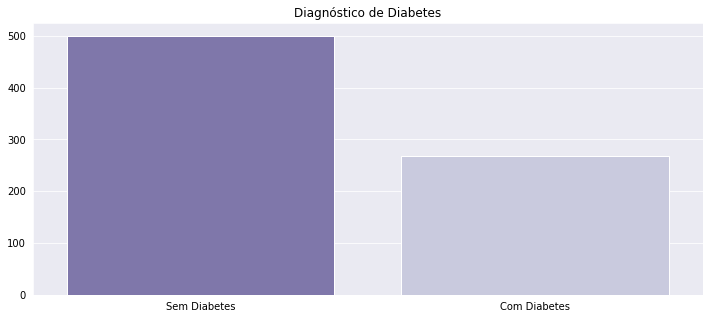

In [1649]:
# Gráfico de barras para visualizar a quantidade de pacientes com diabetes em comparação com a quantidade de pacientes
# sem diabetes:

plt.figure(figsize = (12, 5))
sns.barplot(x = df.outcome.value_counts().index,
            y = df.outcome.value_counts().values,
            palette = 'Purples_r')
plt.xticks(ticks = [0, 1],
           labels = ['Sem Diabetes', 'Com Diabetes'],
           fontsize = 10, color = 'k')
plt.yticks(ticks = np.arange(0, 501, 100), fontsize = 10, color = 'k')
plt.title('Diagnóstico de Diabetes', fontsize = 12, color = 'k');

#### (2) A quantidade de gravidezes de uma paciente é correlacionada com o fato da paciente ter diabetes ou não?

In [1650]:
# Valores únicos de gravidezes das pacientes:

df.pregnancies.unique()

array([ 6,  1,  8,  0,  5,  3, 10,  2,  4,  7,  9, 11, 13, 15, 17, 12, 14])

In [1651]:
# Quantidade de valores únicos:

df.pregnancies.nunique()

17

In [1652]:
# Quantidade de pacientes por quantidade de gravidezes que tiveram:

df.pregnancies.value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: pregnancies, dtype: int64

In [1653]:
# Porcentagem de pacientes por quantidade de gravidezes que tiveram:

df.pregnancies.value_counts(normalize = True).round(2) * 100

1     18.0
0     14.0
2     13.0
3     10.0
4      9.0
5      7.0
6      7.0
7      6.0
8      5.0
9      4.0
10     3.0
11     1.0
13     1.0
12     1.0
14     0.0
15     0.0
17     0.0
Name: pregnancies, dtype: float64

In [1654]:
# Soma acumulativa da porcentagem de pacientes por quantidade de gravidezes:

df.pregnancies.value_counts(normalize = True).round(2).cumsum().loc[:3] * 100

1    18.0
0    32.0
2    45.0
3    55.0
Name: pregnancies, dtype: float64

In [1655]:
# Visualização tabular da quantidade de pacientes sem diabetes por quantidades de gravidezes:

pd.crosstab(index = df['pregnancies'],
            columns = df['outcome'])[[0]].sort_values(by = 0, ascending = False)

outcome,0
pregnancies,
1,106
2,84
0,73
3,48
4,45
5,36
6,34
7,20
8,16


In [1656]:
# Visualização tabular da quantidade de pacientes com diabetes por quantidades de gravidezes:

pd.crosstab(index = df['pregnancies'],
            columns = df['outcome'])[[1]].sort_values(by = 1, ascending = False)

outcome,1
pregnancies,
0,38
1,29
3,27
7,25
4,23
8,22
5,21
2,19
9,18


### (3) Qual é a relação do nível de glicose no sangue com a diabetes?

In [1657]:
# Valores únicos de glicose:

df.glucose.unique()

array([148,  85, 183,  89, 137, 116,  78, 115, 197, 125, 110, 168, 139,
       189, 166, 100, 118, 107, 103, 126,  99, 196, 119, 143, 147,  97,
       145, 117, 109, 158,  88,  92, 122, 138, 102,  90, 111, 180, 133,
       106, 171, 159, 146,  71, 105, 101, 176, 150,  73, 187,  84,  44,
       141, 114,  95, 129,  79,   0,  62, 131, 112, 113,  74,  83, 136,
        80, 123,  81, 134, 142, 144,  93, 163, 151,  96, 155,  76, 160,
       124, 162, 132, 120, 173, 170, 128, 108, 154,  57, 156, 153, 188,
       152, 104,  87,  75, 179, 130, 194, 181, 135, 184, 140, 177, 164,
        91, 165,  86, 193, 191, 161, 167,  77, 182, 157, 178,  61,  98,
       127,  82,  72, 172,  94, 175, 195,  68, 186, 198, 121,  67, 174,
       199,  56, 169, 149,  65, 190])

In [1658]:
# Quantidade de valores únicos:

df.glucose.nunique()

136

In [1659]:
# Filtragem das pacientes com glicose registrada em 0:

df[df.glucose == 0]

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [1660]:
# Mediana de glicose das pacientes:

df.glucose.median()

117.0

In [1661]:
# Mediana de glicose das pacientes, sem considerar às pacientes com glicose registradamente igual à 0:

df[df.glucose != 0].glucose.median()

117.0

In [1662]:
# Mediana de glicose das pacientes sem diabetes, sem considerar às pacientes com glicose registradamente igual à 0:

df[(df.glucose != 0) & (df.outcome == 0)].glucose.median()

107.0

In [1663]:
# Mediana de glicose das pacientes sem diabetes, sem considerar às pacientes com glicose registradamente igual à 0:

df[(df.glucose != 0) & (df.outcome == 1)].glucose.median()

140.0

In [1664]:
# Substituição de glicose igual à zero pela mediana de glicose registrada entre às pacientes:

df.glucose = np.where(df.glucose == 0, 
                      df[df.glucose != 0].glucose.median(), df['glucose'])

In [1665]:
# Informações estatísticas sobre a glicose das pacientes:

df.glucose.describe()

count    768.000000
mean     121.656250
std       30.438286
min       44.000000
25%       99.750000
50%      117.000000
75%      140.250000
max      199.000000
Name: glucose, dtype: float64

In [1666]:
# Informações estatísticas sobre a glicose das pacientes sem diabetes:

df[df.outcome == 0].glucose.describe()

count    500.000000
mean     110.682000
std       24.707201
min       44.000000
25%       93.000000
50%      107.500000
75%      125.000000
max      197.000000
Name: glucose, dtype: float64

In [1667]:
# Informações estatísticas sobre a glicose das pacientes com diabetes:

df[df.outcome == 1].glucose.describe()

count    268.000000
mean     142.130597
std       29.568839
min       78.000000
25%      119.000000
50%      140.000000
75%      167.000000
max      199.000000
Name: glucose, dtype: float64

In [1668]:
# Reverificação da glicose das pacientes:

df.glucose.median().round(2)

117.0

In [1669]:
# Glicose das pacientes sem diabetes:

df[df.outcome == 0].glucose.median()

107.5

In [1670]:
# Glicose das pacientes com diabetes:

df[df.outcome == 1].glucose.median()

140.0

In [1671]:
# Amplitude total da glicose das pacientes sem e com diabetes:

print(f'Amplitude da Glicose de Indíviduos Com Diabetes: {df.query("outcome == 1").glucose.max() - df.query("outcome == 1 & glucose != 0").glucose.min()}')
print('\n')
print(f'Amplitude da Glicose de Indíviduos Sem Diabetes: {df.query("outcome == 0").glucose.max() - df.query("outcome == 0 & glucose != 0").glucose.min()}')

Amplitude da Glicose de Indíviduos Com Diabetes: 121.0


Amplitude da Glicose de Indíviduos Sem Diabetes: 153.0


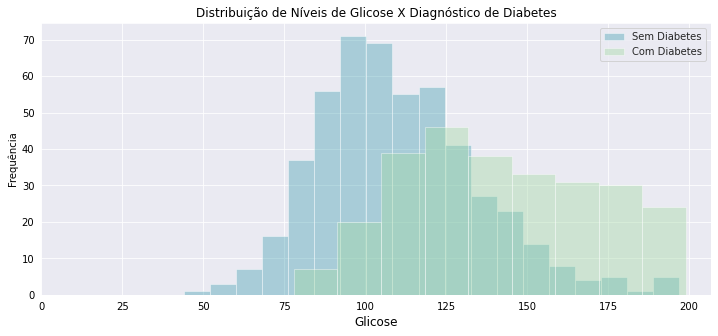

In [1672]:
# Histograma para visualizar a distribuição de frequência das pacientes sem diabetes
# em comparação com as pacientes com diabetes:

import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize = (12, 5))

sns.distplot(df.query("outcome == 0").glucose, label = 'Sem Diabetes',
             kde = False, color = sns.color_palette('Spectral_r')[0])
sns.distplot(df.query("outcome == 1").glucose, label = 'Com Diabetes',
             kde = False, color = sns.color_palette('Spectral_r')[1])
plt.xlabel('Glicose', fontsize = 12, color = 'k')
plt.xticks(np.arange(0, 201, 25), fontsize = 10, color = 'k')
plt.yticks(np.arange(0, 71, 10), fontsize = 10, color = 'k')
plt.title('Distribuição de Níveis de Glicose X Diagnóstico de Diabetes',
          fontsize = 12, color = 'k')
plt.ylabel('Frequência', fontsize = 10, color = 'k')
plt.legend()
plt.show()

### (4) Qual é a média e a mediana de pressão sanguínea das pacientes com diabetes em comparação às pacientes sem diabetes?

In [1673]:
# Valores únicos de pressão sanguínea:

df.bloodpressure.unique()

array([ 72,  66,  64,  40,  74,  50,   0,  70,  96,  92,  80,  60,  84,
        30,  88,  90,  94,  76,  82,  75,  58,  78,  68, 110,  56,  62,
        85,  86,  48,  44,  65, 108,  55, 122,  54,  52,  98, 104,  95,
        46, 102, 100,  61,  24,  38, 106, 114])

In [1674]:
# Quantidade de valores únicos:

df.bloodpressure.nunique()

47

In [1675]:
# Mediana da pressão sanguínea das pacientes com uma pressão sanguínea diferente de 0:

df[df.bloodpressure != 0].bloodpressure.median()

72.0

In [1676]:
# Mediana da pressão sanguínea das pacientes sem diabetes com uma pressão sanguínea diferente de 0:

df[(df.bloodpressure != 0) & (df.outcome == 0)].bloodpressure.median()

70.0

In [1677]:
# Mediana da pressão sanguínea das pacientes com diabetes, e com uma pressão sanguínea diferente de 0:

df[(df.bloodpressure != 0) & (df.outcome == 1)].bloodpressure.median()

74.5

In [1678]:
# Substituição de pressão sanguínea igual à 0 pela mediana de pressão sanguínea das pacientes em geral:

df.bloodpressure = np.where(df.bloodpressure == 0, 
                      df[df.bloodpressure != 0].bloodpressure.median(), df['bloodpressure'])

In [1679]:
# Informações estatísticas da pressão sanguínea das pacientes:

df.bloodpressure.describe().round(2)

count    768.00
mean      72.39
std       12.10
min       24.00
25%       64.00
50%       72.00
75%       80.00
max      122.00
Name: bloodpressure, dtype: float64

In [1680]:
# Informações estatísticas da pressão sanguínea das pacientes sem diabetes:

df[df.outcome == 0].bloodpressure.describe().round(2)

count    500.00
mean      70.92
std       11.93
min       24.00
25%       63.50
50%       72.00
75%       78.00
max      122.00
Name: bloodpressure, dtype: float64

In [1681]:
# Informações estatísticas da pressão sanguínea das pacientes com diabetes:

df[df.outcome == 1].bloodpressure.describe().round(2)

count    268.00
mean      75.12
std       11.95
min       30.00
25%       68.00
50%       74.00
75%       82.00
max      114.00
Name: bloodpressure, dtype: float64

In [1682]:
# Tabela com a média, mediana e desvio-padrão de pressão sanguínea das pacientes sem diabetes
# em comparação com às pacientes com diabetes:

pd.pivot_table(data = df, aggfunc = ['mean', 'median', 'std'],
               columns = 'outcome',
               values = 'bloodpressure').round(2)

mean        median          std       
outcome            0      1      0     1      0      1
bloodpressure  70.92  75.12   72.0  74.0  11.93  11.95

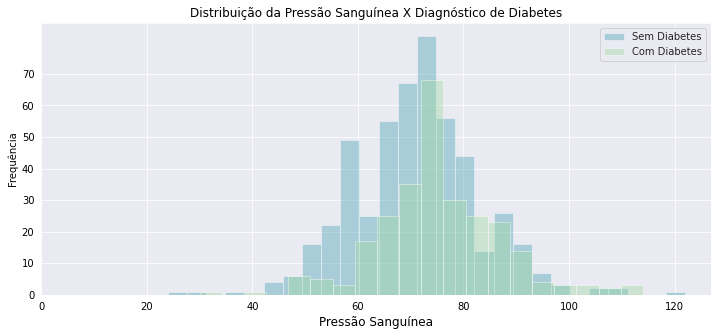

In [1683]:
# Histograma com a distribuição de frequência de pressão sanguínea das pacientes sem diabetes em 
# comparação com às pacientes com diabetes:

plt.figure(figsize = (12, 5))

sns.distplot(df.query("outcome == 0").bloodpressure, label = 'Sem Diabetes',
             kde = False, color = sns.color_palette('Spectral_r')[0])
sns.distplot(df.query("outcome == 1").bloodpressure, label = 'Com Diabetes',
             kde = False, color = sns.color_palette('Spectral_r')[1])
plt.xlabel('Pressão Sanguínea', fontsize = 12, color = 'k')
plt.xticks(np.arange(0, 121, 20), fontsize = 10, color = 'k')
plt.yticks(np.arange(0, 71, 10), fontsize = 10, color = 'k')
plt.title('Distribuição da Pressão Sanguínea X Diagnóstico de Diabetes',
        fontsize = 12, color = 'k')
plt.ylabel('Frequência', fontsize = 10, color = 'k')
plt.legend()
plt.show()

### (5) Há alguma diferença estatisticamente notável na espessura de pele de pacientes com diabetes em relação aos sem diabetes?

In [1684]:
# Valores únicos da espessura da pele:

df.skinthickness.unique()

array([35, 29,  0, 23, 32, 45, 19, 47, 38, 30, 41, 33, 26, 15, 36, 11, 31,
       37, 42, 25, 18, 24, 39, 27, 21, 34, 10, 60, 13, 20, 22, 28, 54, 40,
       51, 56, 14, 17, 50, 44, 12, 46, 16,  7, 52, 43, 48,  8, 49, 63, 99])

In [1685]:
# Quantidade de valores únicos da espessura da pele:

df.skinthickness.nunique()

51

In [1686]:
# Mediana da espessura da pele das pacientes com uma espessura diferente de 0:

df[df.skinthickness != 0].skinthickness.median()

29.0

In [1687]:
# Mediana da espessura da pele das pacientes sem diabetes com uma espessura diferente de 0:

df[(df.skinthickness != 0) & (df.outcome == 0)].skinthickness.median()

27.0

In [1688]:
# Mediana da espessura da pele das pacientes com diabetes com uma espessura diferente de 0:

df[(df.skinthickness != 0) & (df.outcome == 1)].skinthickness.median()

32.0

In [1689]:
# Substituição de espessura da pela igual à 0 pela mediana de espessura da pele das pacientes em geral:

df.skinthickness = np.where(df.skinthickness == 0, 
                      df[df.skinthickness != 0].skinthickness.median(), df['skinthickness'])

In [1690]:
# Informações estatísticas sobre a espessura de pele das pacientes:

df.skinthickness.describe().round(2)

count    768.00
mean      29.11
std        8.79
min        7.00
25%       25.00
50%       29.00
75%       32.00
max       99.00
Name: skinthickness, dtype: float64

In [1691]:
# Mediana de espessura da pele das pacientes, após tal correção nos dados:

df.skinthickness.median().round(2)

29.0

In [1692]:
# Tabela com a média, mediana e desvio-padrão da espessura da pele das pacientes sem diabetes
# em comparação com às pacientes com diabetes:

pd.pivot_table(data = df, aggfunc = ['mean', 'median', 'std'],
               columns = 'outcome',
               values = 'skinthickness').round(2)

mean        median         std      
outcome            0      1      0     1     0     1
skinthickness  27.73  31.69   29.0  29.0  8.55  8.66

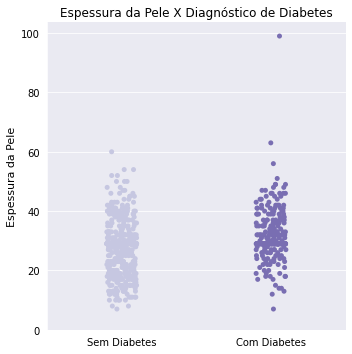

In [1693]:
# Gráfico catplot para vermos a distribuição da espessura de pele das pacientes sem diabetes
# em comparação com às pacientes com diabetes:

sns.catplot(data = df,
            x = 'outcome',
            y = 'skinthickness',
            palette = 'Purples')
plt.xlabel('')
plt.ylabel('Espessura da Pele',
           fontsize = 11, color = 'k')
plt.yticks(ticks = np.arange(0, 101, 20), fontsize = 10, color = 'k')
plt.xticks(ticks = [0, 1],
           labels = ['Sem Diabetes', 'Com Diabetes'],
           fontsize = 10, color = 'k')
plt.title('Espessura da Pele X Diagnóstico de Diabetes',
          fontsize = 12, color = 'k')
plt.show()

### (6) Qual é a relação estatística entre o nível de insulina no sangue e o diagnóstico de diabetes?

In [1694]:
# Valores únicos de insulina registrada:

df.insulin.unique()

array([  0,  94, 168,  88, 543, 846, 175, 230,  83,  96, 235, 146, 115,
       140, 110, 245,  54, 192, 207,  70, 240,  82,  36,  23, 300, 342,
       304, 142, 128,  38, 100,  90, 270,  71, 125, 176,  48,  64, 228,
        76, 220,  40, 152,  18, 135, 495,  37,  51,  99, 145, 225,  49,
        50,  92, 325,  63, 284, 119, 204, 155, 485,  53, 114, 105, 285,
       156,  78, 130,  55,  58, 160, 210, 318,  44, 190, 280,  87, 271,
       129, 120, 478,  56,  32, 744, 370,  45, 194, 680, 402, 258, 375,
       150,  67,  57, 116, 278, 122, 545,  75,  74, 182, 360, 215, 184,
        42, 132, 148, 180, 205,  85, 231,  29,  68,  52, 255, 171,  73,
       108,  43, 167, 249, 293,  66, 465,  89, 158,  84,  72,  59,  81,
       196, 415, 275, 165, 579, 310,  61, 474, 170, 277,  60,  14,  95,
       237, 191, 328, 250, 480, 265, 193,  79,  86, 326, 188, 106,  65,
       166, 274,  77, 126, 330, 600, 185,  25,  41, 272, 321, 144,  15,
       183,  91,  46, 440, 159, 540, 200, 335, 387,  22, 291, 39

In [1695]:
# Quantidade de valores únicos de insulina:

df.insulin.nunique()

186

In [1696]:
# Mediana da insulina das pacientes:

df.insulin.median()

30.5

In [1697]:
#  Mediana da insulina das pacientes sem diabetes, com insulina diferente de 0:

df[(df['outcome'] == 0) & (df['insulin'] != 0)].insulin.median()

102.5

In [1698]:
#  Mediana da insulina das pacientes com diabetes, com insulina diferente de 0:

df[(df['outcome'] == 1) & (df['insulin'] != 0)].insulin.median()

169.5

In [1699]:
# Filtro das pacientes com insulina registrada igual à 0:

df[df.insulin == 0].insulin

0      0
1      0
2      0
5      0
7      0
      ..
761    0
762    0
764    0
766    0
767    0
Name: insulin, Length: 374, dtype: int64

In [1700]:
# Lista para obter os índices das pacientes sem diabetes registradas com insulina igual à 0:

l1 = list((df[(df.insulin == 0) & (df.outcome == 0)].insulin.index))

In [1701]:
# Verificação da lista criada:

print(l1)

[1, 5, 7, 10, 12, 21, 29, 30, 33, 34, 36, 41, 42, 44, 46, 47, 49, 55, 58, 60, 62, 65, 67, 74, 75, 76, 77, 79, 80, 81, 83, 86, 89, 90, 96, 101, 102, 104, 106, 113, 117, 118, 121, 123, 133, 138, 140, 141, 145, 146, 148, 149, 151, 160, 163, 166, 167, 168, 172, 176, 178, 180, 183, 184, 190, 194, 196, 200, 201, 202, 205, 210, 211, 212, 222, 226, 233, 239, 240, 246, 249, 250, 251, 253, 256, 257, 262, 263, 267, 268, 272, 274, 278, 294, 299, 304, 310, 324, 327, 330, 333, 336, 342, 343, 344, 347, 350, 351, 352, 354, 361, 362, 367, 381, 398, 401, 403, 407, 410, 416, 418, 423, 426, 430, 433, 434, 436, 437, 438, 439, 453, 456, 461, 463, 464, 470, 471, 472, 473, 474, 475, 479, 481, 488, 489, 491, 492, 494, 495, 496, 501, 504, 505, 509, 512, 513, 517, 518, 522, 524, 525, 529, 531, 533, 536, 537, 549, 550, 552, 556, 557, 558, 559, 564, 570, 571, 578, 581, 582, 583, 585, 587, 589, 596, 600, 601, 602, 605, 613, 615, 616, 621, 622, 624, 626, 627, 628, 629, 632, 634, 636, 641, 643, 649, 653, 658, 660, 67

In [1702]:
# Lista para obter os índices das pacientes com diabetes registradas com insulina igual à 0:

l2 = list((df[(df.insulin == 0) & (df.outcome == 1)].insulin.index))

In [1703]:
# Verificação da segunda lista criada:

print(l2)

[0, 2, 9, 11, 15, 17, 22, 23, 26, 37, 38, 45, 48, 61, 64, 66, 72, 78, 84, 93, 100, 115, 116, 124, 129, 131, 143, 154, 155, 164, 170, 179, 185, 192, 193, 207, 209, 218, 219, 221, 227, 230, 235, 237, 238, 242, 245, 255, 261, 264, 266, 269, 270, 276, 280, 283, 284, 300, 303, 314, 317, 319, 321, 322, 332, 337, 339, 349, 355, 357, 363, 366, 378, 386, 387, 391, 394, 397, 399, 400, 404, 406, 408, 417, 435, 440, 443, 444, 451, 455, 468, 484, 502, 510, 523, 535, 542, 560, 577, 579, 580, 586, 590, 592, 598, 604, 618, 619, 630, 635, 642, 661, 664, 666, 667, 675, 676, 678, 681, 683, 691, 701, 702, 706, 708, 712, 719, 731, 739, 743, 746, 749, 750, 754, 757, 759, 761, 766]


In [1704]:
# Filtro da coluna 'insulin' das pacientes sem diabetes com o registro de insulina igual à 0: 

df.loc[l1, 'insulin']

1      0
5      0
7      0
10     0
12     0
      ..
756    0
758    0
762    0
764    0
767    0
Name: insulin, Length: 236, dtype: int64

In [1705]:
# Filtro da coluna 'insulin' das pacientes com diabetes com o registro de insulina igual à 0: 

df.loc[l2, 'insulin']

0      0
2      0
9      0
11     0
15     0
      ..
754    0
757    0
759    0
761    0
766    0
Name: insulin, Length: 138, dtype: int64

In [1706]:
# List-compreehension para substituir o valor de insulina igual à zero das pacientes sem diabetes
# pela mediana de insulina entre todas às pacientes sem diabetes:

df.loc[l1, 'insulin'] = [df[(df.insulin != 0) & (df.outcome == 0)].insulin.median() for i in df.loc[l1, 'insulin']]

In [1707]:
# List-compreehension para substituir o valor de insulina igual à zero das pacientes sem diabetes
# pela mediana de insulina entre todas às pacientes sem diabetes:

df.loc[l2, 'insulin'] = [df[(df.insulin != 0) & (df.outcome == 1)].insulin.median() for i in df.loc[l2, 'insulin']]

In [1708]:
# Quantidade de pacientes por insulina registrada:

df.insulin.value_counts()

102.5    236
169.5    138
105.0     11
130.0      9
140.0      9
        ... 
73.0       1
171.0      1
255.0      1
52.0       1
112.0      1
Name: insulin, Length: 187, dtype: int64

In [1709]:
# Informações estatísticas sobre a insulina registrada nas pacientes:

df.insulin.describe().round(2)

count    768.00
mean     141.75
std       89.10
min       14.00
25%      102.50
50%      102.50
75%      169.50
max      846.00
Name: insulin, dtype: float64

In [1710]:
# Mediana de insulina das pacientes: 

df.insulin.median()

102.5

In [1711]:
# Porcentagem de pacientes por quantidade de insulina registrada:

(df.insulin.value_counts(normalize = True) * 100).round(2).iloc[:10]

102.5    30.73
169.5    17.97
105.0     1.43
130.0     1.17
140.0     1.17
120.0     1.04
94.0      0.91
180.0     0.91
100.0     0.91
135.0     0.78
Name: insulin, dtype: float64

In [1712]:
# Informações estatísticas sobre a insulina das pacientes sem diabetes:

df.query('outcome == 0').insulin.describe().round(2)

count    500.00
mean     117.17
std       75.69
min       15.00
25%       95.00
50%      102.50
75%      105.00
max      744.00
Name: insulin, dtype: float64

In [1713]:
# Quantidade de pacientes sem diabetes por quantidade de insulina registrada:

df.query('outcome == 0').insulin.value_counts().iloc[:10]

102.5    236
105.0     10
140.0      8
94.0       7
100.0      6
120.0      6
66.0       5
56.0       5
49.0       5
76.0       5
Name: insulin, dtype: int64

In [1714]:
# Porcentagem de pacientes sem diabetes por quantidade de insulina registrada:

(df.query('outcome == 0').insulin.value_counts(normalize = True) * 100).round(2).iloc[:10]

102.5    47.2
105.0     2.0
140.0     1.6
94.0      1.4
100.0     1.2
120.0     1.2
66.0      1.0
56.0      1.0
49.0      1.0
76.0      1.0
Name: insulin, dtype: float64

In [1715]:
# Mediana de insulina entre às pacientes sem diabetes:

df.query('outcome == 0').insulin.median()

102.5

In [1716]:
# Informações estatísticas sobre a insulina das pacientes sem diabetes:

df.query('outcome == 1').insulin.describe().round(2)

count    268.00
mean     187.62
std       94.11
min       14.00
25%      169.50
50%      169.50
75%      169.50
max      846.00
Name: insulin, dtype: float64

In [1717]:
# Mediana de insulina entre às pacientes sem diabetes:

df.query('outcome == 1').insulin.median()

169.5

In [1718]:
# Quantidade de pacientes com diabetes por quantidade de insulina registrada:

df.query('outcome == 1').insulin.value_counts().iloc[:10]

169.5    138
130.0      6
180.0      4
175.0      3
156.0      3
185.0      2
194.0      2
168.0      2
144.0      2
210.0      2
Name: insulin, dtype: int64

In [1719]:
# Porcentagem de pacientes sem diabetes por quantidade de insulina registrada:

(df.query('outcome == 1').insulin.value_counts(normalize = True) * 100).round(2).iloc[:10]

169.5    51.49
130.0     2.24
180.0     1.49
175.0     1.12
156.0     1.12
185.0     0.75
194.0     0.75
168.0     0.75
144.0     0.75
210.0     0.75
Name: insulin, dtype: float64

In [1720]:
# Criação de função para calcular o intervalo-interquartil de qualquer coluna, para podermos filtrar dados atípicos no dataset

def calculo_iqr(x):
  IQR = df[x].quantile(0.75) - df[x].quantile(0.25)
  lim_inf = df[x].quantile(0.25) - (IQR * 1.5)
  lim_sup = df[x].quantile(0.75) + (IQR * 1.5)
  return lim_inf, lim_sup

In [1721]:
# Limite inferior e superior da coluna 'insulin' com a função de cálculo de IQR:

calculo_iqr('insulin')

(2.0, 270.0)

In [1722]:
# Filtro de dados acima do limite inferior e abaixo do limite superior de insulina:

df[(df['insulin'] >= 2) & (df['insulin'] <= 270)]

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8,183.0,64.0,29.0,169.5,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,102.5,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,29.0,169.5,30.1,0.349,47,1


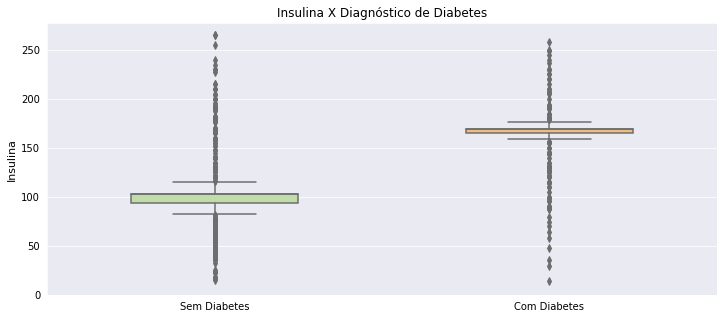

In [1723]:
# Distribuição de insulina das pacientes sem diabetes em comparação às pacientes com diabetes
#, após filtrar os outliers de tal coluna:

plt.figure(figsize = (12, 5))
sns.boxplot(data = df[(df['insulin'] > 2) & (df['insulin'] < 270)],
            x = 'outcome',
            y = 'insulin', width = 0.5, palette = 'Spectral_r')
plt.xlabel('')
plt.ylabel('Insulina',
           fontsize = 11, color = 'k')
plt.xticks([0, 1], labels = ['Sem Diabetes', 'Com Diabetes'], fontsize = 10, color = 'k')
plt.yticks(np.arange(0, 251, 50), fontsize = 10, color = 'k')
plt.title('Insulina X Diagnóstico de Diabetes', fontsize = 12, color = 'k');

### (7) O índice de massa corporal das pacientes apresenta alguma relação com o fato destas pacientes terem sido diagnosticadas com diabetes ou não?

In [1724]:
# Valores únicos de índice de massa corporal:

df.bmi.unique()

array([33.6, 26.6, 23.3, 28.1, 43.1, 25.6, 31. , 35.3, 30.5,  0. , 37.6,
       38. , 27.1, 30.1, 25.8, 30. , 45.8, 29.6, 43.3, 34.6, 39.3, 35.4,
       39.8, 29. , 36.6, 31.1, 39.4, 23.2, 22.2, 34.1, 36. , 31.6, 24.8,
       19.9, 27.6, 24. , 33.2, 32.9, 38.2, 37.1, 34. , 40.2, 22.7, 45.4,
       27.4, 42. , 29.7, 28. , 39.1, 19.4, 24.2, 24.4, 33.7, 34.7, 23. ,
       37.7, 46.8, 40.5, 41.5, 25. , 25.4, 32.8, 32.5, 42.7, 19.6, 28.9,
       28.6, 43.4, 35.1, 32. , 24.7, 32.6, 43.2, 22.4, 29.3, 24.6, 48.8,
       32.4, 38.5, 26.5, 19.1, 46.7, 23.8, 33.9, 20.4, 28.7, 49.7, 39. ,
       26.1, 22.5, 39.6, 29.5, 34.3, 37.4, 33.3, 31.2, 28.2, 53.2, 34.2,
       26.8, 55. , 42.9, 34.5, 27.9, 38.3, 21.1, 33.8, 30.8, 36.9, 39.5,
       27.3, 21.9, 40.6, 47.9, 50. , 25.2, 40.9, 37.2, 44.2, 29.9, 31.9,
       28.4, 43.5, 32.7, 67.1, 45. , 34.9, 27.7, 35.9, 22.6, 33.1, 30.4,
       52.3, 24.3, 22.9, 34.8, 30.9, 40.1, 23.9, 37.5, 35.5, 42.8, 42.6,
       41.8, 35.8, 37.8, 28.8, 23.6, 35.7, 36.7, 45

In [1725]:
# Quantidade de valores únicos:

df.bmi.nunique()

248

In [1726]:
# Filtragem de pacientes com índice de massa corporal igual à 0:

df.query('bmi == 0')

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
9,8,125.0,96.0,29.0,169.5,0.0,0.232,54,1
49,7,105.0,72.0,29.0,102.5,0.0,0.305,24,0
60,2,84.0,72.0,29.0,102.5,0.0,0.304,21,0
81,2,74.0,72.0,29.0,102.5,0.0,0.102,22,0
145,0,102.0,75.0,23.0,102.5,0.0,0.572,21,0
371,0,118.0,64.0,23.0,89.0,0.0,1.731,21,0
426,0,94.0,72.0,29.0,102.5,0.0,0.256,25,0
494,3,80.0,72.0,29.0,102.5,0.0,0.174,22,0
522,6,114.0,72.0,29.0,102.5,0.0,0.189,26,0
684,5,136.0,82.0,29.0,102.5,0.0,0.640,69,0


In [1727]:
# Informações estatísticas sobre o índice de massa corporal das pacientes:

df.bmi.describe().round(2)

count    768.00
mean      31.99
std        7.88
min        0.00
25%       27.30
50%       32.00
75%       36.60
max       67.10
Name: bmi, dtype: float64

In [1728]:
# Mediana do índice de massa corporal das pacientes:

df.bmi.median()

32.0

In [1729]:
# Informações estatísticas sobre o índice de massa corporal diferente de 0 das pacientes sem diabetes:

df[(df['outcome'] == 0) & (df['bmi'] != 0)].bmi.describe().round(2)

count    491.00
mean      30.86
std        6.56
min       18.20
25%       25.60
50%       30.10
75%       35.30
max       57.30
Name: bmi, dtype: float64

In [1730]:
# Mediana do índice de massa corporal diferente de 0 das pacientes com diabetes:

df[(df['outcome'] == 0) & (df['bmi'] != 0)].bmi.median()

30.1

In [1731]:
# Informações estatísticas sobre o índice de massa corporal diferente de 0 das pacientes com diabetes:

df[(df['outcome'] == 1) & (df['bmi'] != 0)].bmi.describe().round(2)

count    266.00
mean      35.41
std        6.61
min       22.90
25%       30.90
50%       34.30
75%       38.92
max       67.10
Name: bmi, dtype: float64

In [1732]:
# Mediana do índice de massa corporal diferente de 0 das pacientes com diabetes:

df[(df['outcome'] == 1) & (df['bmi'] != 0)].bmi.median()

34.3

In [1733]:
# Lista para obter os índices das pacientes sem diabetes registradas com índice de massa corporal igual à 0:

l3 = list((df[(df.bmi == 0) & (df.outcome == 0)].bmi.index))

In [1734]:
# Lista para obter os índices das pacientes com diabetes registradas com índice de massa corporal igual à 0:

l4 = list((df[(df.bmi == 0) & (df.outcome == 1)].bmi.index))

In [1735]:
# List-compreehension para substituir o valor de índice de massa corporal igual à zero das pacientes sem diabetes
# pela mediana de índice de massa corporal entre todas às pacientes sem diabetes:

df.loc[l3, 'bmi'] = [df[(df.bmi != 0) & (df.outcome == 0)].bmi.median() for i in df.loc[l3, 'bmi']]

In [1736]:
# List-compreehension para substituir o valor de índice de massa corporal igual à zero das pacientes sem diabetes
# pela mediana de índice de massa corporal entre todas às pacientes com diabetes:

df.loc[l4, 'bmi'] = [df[(df.bmi != 0) & (df.outcome == 1)].bmi.median() for i in df.loc[l4, 'bmi']]

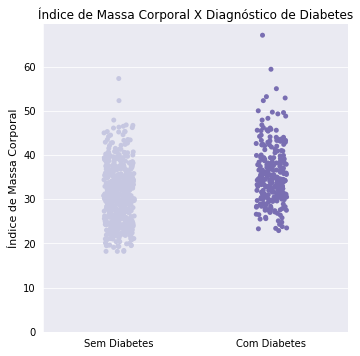

In [1737]:
# Gráfico catplot para vermos a distribuição do índice de massa corporal das pacientes sem diabetes
# em comparação com às pacientes com diabetes:

sns.catplot(data = df,
            x = 'outcome',
            y = 'bmi',
            palette = 'Purples')
plt.xlabel('')
plt.ylabel('Índice de Massa Corporal',
           fontsize = 11, color = 'k')
plt.yticks(ticks = np.arange(0, 61, 10), fontsize = 10, color = 'k')
plt.xticks(ticks = [0, 1],
           labels = ['Sem Diabetes', 'Com Diabetes'],
           fontsize = 10, color = 'k')
plt.title('Índice de Massa Corporal X Diagnóstico de Diabetes',
          fontsize = 12, color = 'k')
plt.show()

In [1738]:
# Tabela com a média, mediana e desvio-padrão do índice de massa corporal das pacientes sem diabetes
# em comparação com às pacientes com diabetes:

pd.pivot_table(data = df, aggfunc = ['mean', 'median', 'std'],
               columns = 'outcome',
               values = 'bmi').round(2)

mean       median        std      
outcome      0     1      0     1    0     1
bmi      30.85  35.4   30.1  34.3  6.5  6.59

### (8) A porcentagem de diabetes é drasticamente maior nas pacientes com diabetes em comparação às pacientes sem diabetes?

In [1739]:
# Valores únicos da porcentagem de diabetes das pacientes:

df.diabetespedigreefunction.unique()

array([0.627, 0.351, 0.672, 0.167, 2.288, 0.201, 0.248, 0.134, 0.158,
       0.232, 0.191, 0.537, 1.441, 0.398, 0.587, 0.484, 0.551, 0.254,
       0.183, 0.529, 0.704, 0.388, 0.451, 0.263, 0.205, 0.257, 0.487,
       0.245, 0.337, 0.546, 0.851, 0.267, 0.188, 0.512, 0.966, 0.42 ,
       0.665, 0.503, 1.39 , 0.271, 0.696, 0.235, 0.721, 0.294, 1.893,
       0.564, 0.586, 0.344, 0.305, 0.491, 0.526, 0.342, 0.467, 0.718,
       0.962, 1.781, 0.173, 0.304, 0.27 , 0.699, 0.258, 0.203, 0.855,
       0.845, 0.334, 0.189, 0.867, 0.411, 0.583, 0.231, 0.396, 0.14 ,
       0.391, 0.37 , 0.307, 0.102, 0.767, 0.237, 0.227, 0.698, 0.178,
       0.324, 0.153, 0.165, 0.443, 0.261, 0.277, 0.761, 0.255, 0.13 ,
       0.323, 0.356, 0.325, 1.222, 0.179, 0.262, 0.283, 0.93 , 0.801,
       0.207, 0.287, 0.336, 0.247, 0.199, 0.543, 0.192, 0.588, 0.539,
       0.22 , 0.654, 0.223, 0.759, 0.26 , 0.404, 0.186, 0.278, 0.496,
       0.452, 0.403, 0.741, 0.361, 1.114, 0.457, 0.647, 0.088, 0.597,
       0.532, 0.703,

In [1740]:
# Quantidade de valores únicos da coluna:

df.diabetespedigreefunction.nunique()

517

In [1741]:
# Filtragem das pacientes com porcentagem de diabetes igual à 0:

df[df['diabetespedigreefunction'] == 0.0]

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome


In [1742]:
# Informações estatísticas sobre a porcentagem de diabetes das pacientes:

df.diabetespedigreefunction.describe().round(2)

count    768.00
mean       0.47
std        0.33
min        0.08
25%        0.24
50%        0.37
75%        0.63
max        2.42
Name: diabetespedigreefunction, dtype: float64

In [1743]:
# Mediana da porcentagem de diabetes das pacientes:

df.diabetespedigreefunction.median().round(2)

0.37

In [1744]:
# Informações estatísticas sobre a porcentagem de diabetes das pacientes sem diabetes:

df[df['outcome'] == 0].diabetespedigreefunction.describe().round(2)

count    500.00
mean       0.43
std        0.30
min        0.08
25%        0.23
50%        0.34
75%        0.56
max        2.33
Name: diabetespedigreefunction, dtype: float64

In [1745]:
# Mediana da porcentagem de diabetes das pacientes sem diabetes:

df[df['outcome'] == 0].diabetespedigreefunction.median().round(2)

0.34

In [1746]:
# Informações estatísticas sobre a porcentagem de diabetes das pacientes com diabetes:

df[df['outcome'] == 1].diabetespedigreefunction.describe().round(2)

count    268.00
mean       0.55
std        0.37
min        0.09
25%        0.26
50%        0.45
75%        0.73
max        2.42
Name: diabetespedigreefunction, dtype: float64

In [1747]:
# Mediana da porcentagem de diabetes das pacientes com diabetes:

df[df['outcome'] == 1].diabetespedigreefunction.median().round(2)

0.45

In [1748]:
# Tabela com a média, mediana e desvio-padrão da porcentagem de diabetes das pacientes sem diabetes
# em comparação com às pacientes com diabetes:

pd.pivot_table(data = df, aggfunc = ['mean', 'median', 'std'],
               columns = 'outcome',
               values = 'diabetespedigreefunction').round(2)

mean       median        std      
outcome                      0     1      0     1    0     1
diabetespedigreefunction  0.43  0.55   0.34  0.45  0.3  0.37

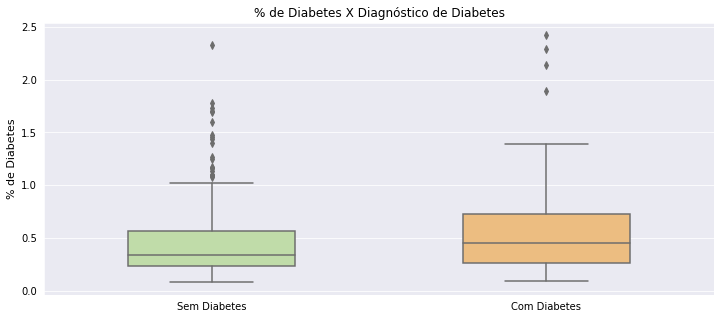

In [1749]:
# Distribuição da porcentagem de diabetes das pacientes sem e com diabetes:

plt.figure(figsize = (12, 5))
sns.boxplot(data = df,
            x = 'outcome',
            y = 'diabetespedigreefunction', width = 0.5, palette = 'Spectral_r')
plt.xlabel('')
plt.ylabel('% de Diabetes',
           fontsize = 11, color = 'k')
plt.xticks([0, 1], labels = ['Sem Diabetes', 'Com Diabetes'], fontsize = 10, color = 'k')
plt.yticks(np.arange(0.0, 2.51, 0.5), fontsize = 10, color = 'k')
plt.title('% de Diabetes X Diagnóstico de Diabetes', fontsize = 12, color = 'k');

### (9) Há alguma correlação vísivel entre a idade da paciente e o fato da paciente ter diabetes ou não?

In [1750]:
# Valores únicos de idades das pacientes:

df.age.unique()

array([50, 31, 32, 21, 33, 30, 26, 29, 53, 54, 34, 57, 59, 51, 27, 41, 43,
       22, 38, 60, 28, 45, 35, 46, 56, 37, 48, 40, 25, 24, 58, 42, 44, 39,
       36, 23, 61, 69, 62, 55, 65, 47, 52, 66, 49, 63, 67, 72, 81, 64, 70,
       68])

In [1751]:
# Quantidade de valores únicos da coluna:

df.age.nunique()

52

In [1752]:
# Informações estatísticas da idade das pacientes:

df.age.describe().round(2)

count    768.00
mean      33.24
std       11.76
min       21.00
25%       24.00
50%       29.00
75%       41.00
max       81.00
Name: age, dtype: float64

In [1753]:
# Mediana da idade das pacientes:

df.age.median().round(2)

29.0

In [1754]:
# Informações estatística da idade das pacientes sem diabetes:

df[df['outcome'] == 0].age.describe().round(2)

count    500.00
mean      31.19
std       11.67
min       21.00
25%       23.00
50%       27.00
75%       37.00
max       81.00
Name: age, dtype: float64

In [1755]:
# Mediana da idade das pacientes sem diabetes:

df[df['outcome'] == 0].age.median().round(2)

27.0

In [1756]:
# Informações estatística da idade das pacientes com diabetes:

df[df['outcome'] == 1].age.describe().round(2)

count    268.00
mean      37.07
std       10.97
min       21.00
25%       28.00
50%       36.00
75%       44.00
max       70.00
Name: age, dtype: float64

In [1757]:
# Mediana da idade das pacientes com diabetes:

df[df['outcome'] == 1].age.median().round(2)

36.0

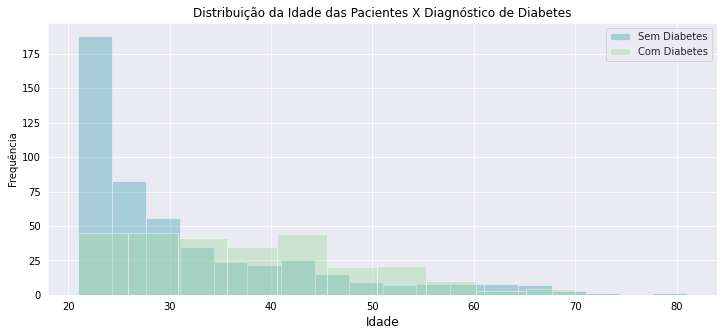

In [1758]:
# Histograma com a distribuição de frequência de idade das pacientes sem e com diabetes diagnosticadas:

plt.figure(figsize = (12, 5))

sns.distplot(df.query("outcome == 0").age, label = 'Sem Diabetes',
             kde = False, color = sns.color_palette('Spectral_r')[0])
sns.distplot(df.query("outcome == 1").age, label = 'Com Diabetes',
             kde = False, color = sns.color_palette('Spectral_r')[1])
plt.xlabel('Idade', fontsize = 12, color = 'k')
plt.xticks(np.arange(20, 81, 10), fontsize = 10, color = 'k')
plt.yticks(np.arange(0, 176, 25), fontsize = 10, color = 'k')
plt.title('Distribuição da Idade das Pacientes X Diagnóstico de Diabetes',
        fontsize = 12, color = 'k')
plt.ylabel('Frequência', fontsize = 10, color = 'k')
plt.legend()
plt.show()

In [1759]:
# Tabela com a média, mediana e desvio-padrão da idade das pacientes sem diabetes
# em comparação com às pacientes com diabetes:

pd.pivot_table(data = df, aggfunc = ['mean', 'median', 'std'],
               columns = 'outcome',
               values = 'age').round(2)

mean        median        std       
outcome      0      1      0   1      0      1
age      31.19  37.07     27  36  11.67  10.97

### Separação - Dados de Treino X Dados de Teste

In [1760]:
# Importação do método para separar o conjunto de dados em dados de treino e dados de teste:

from sklearn.model_selection import train_test_split

In [1761]:
df.columns

Index(['pregnancies', 'glucose', 'bloodpressure', 'skinthickness', 'insulin',
       'bmi', 'diabetespedigreefunction', 'age', 'outcome'],
      dtype='object')

In [1762]:
# Atribuição de todas variáveis independentes e preditoras à variável X:

X = df[['pregnancies', 'glucose', 'insulin',
       'bmi', 'diabetespedigreefunction', 'age']]

In [1763]:
X

,pregnancies,glucose,insulin,bmi,diabetespedigreefunction,age
0,6,148.0,169.5,33.6,0.627,50
1,1,85.0,102.5,26.6,0.351,31
2,8,183.0,169.5,23.3,0.672,32
3,1,89.0,94.0,28.1,0.167,21
4,0,137.0,168.0,43.1,2.288,33
...,...,...,...,...,...,...
763,10,101.0,180.0,32.9,0.171,63
764,2,122.0,102.5,36.8,0.340,27
765,5,121.0,112.0,26.2,0.245,30
766,1,126.0,169.5,30.1,0.349,47


In [1764]:
# Atribuição da variável dependente ou target à variável y:

y = df.iloc[:, -1]

In [1765]:
# Visualização das primeiras linhas da variável X:

X.head()

,pregnancies,glucose,insulin,bmi,diabetespedigreefunction,age
0,6,148.0,169.5,33.6,0.627,50
1,1,85.0,102.5,26.6,0.351,31
2,8,183.0,169.5,23.3,0.672,32
3,1,89.0,94.0,28.1,0.167,21
4,0,137.0,168.0,43.1,2.288,33


In [1766]:
# Visualização das primeiras linhas da variável y:

y.head()

0    1
1    0
2    1
3    0
4    1
Name: outcome, dtype: int64

In [1767]:
# Separação entre dados de treino e dados de teste:
# 20 % para teste e 80 % de dados para treino:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [1768]:
# Quantidade de linhas para treinamento:

X_train.shape[0]

614

In [1769]:
# Quantidade de linhas para teste do modelo:

X_test.shape[0]

154

### Feature Scaling

In [1770]:
# Importação de método para realizar padronização nos dados:

from sklearn.preprocessing import StandardScaler

In [1771]:
# Atribuição de tal método de padronização de escala à uma variável:

sc = StandardScaler()

In [1772]:
# Padronização dos dados de treino:

X_train_2 = sc.fit_transform(X_train)

In [1773]:
# Padronização dos dados de teste:

X_test_2 = sc.transform(X_test)

### Treino no modelo de KNN (K-Nearest Neighbors)

In [1774]:
# Importação do modelo de KNeighborsClassifier:

from sklearn.neighbors import KNeighborsClassifier

In [1775]:
# KNeighborsClassifier atribuído à uma variável:

knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)

In [1776]:
# Treino de KNeighborsClassifier sobre o conjunto de dados de treino:

knn.fit(X_train_2, y_train)

KNeighborsClassifier()

### Teste de acurácia do modelo de KNN

In [1777]:
# Importação de métricas para avaliação de acurácia preditiva do modelo treinado:

from sklearn.metrics import confusion_matrix, accuracy_score

In [1778]:
# Atribuição de dados previstos pelo modelo à uma variável:

y_pred = knn.predict(X_test_2)

In [1779]:
# Pontuação de acurácia preditiva do modelo de KNeighborsClassifier:

accuracy_score(y_test, y_pred).round(2)

0.81

In [1780]:
# Confusão de matriz do modelo:

cm = confusion_matrix(y_test, y_pred)

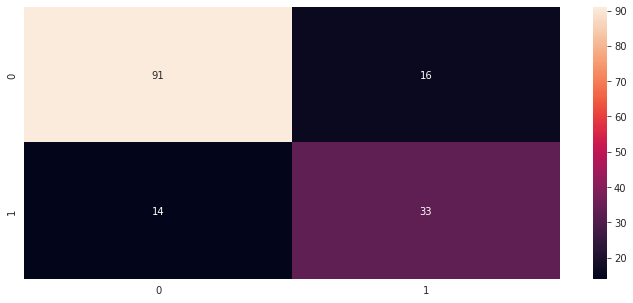

In [1781]:
# Confusão de matriz do modelo para vermos quantas previsões realizadas pelo modelo foram corretas ou incorretas:

plt.figure(figsize = (12, 5))
sns.heatmap(cm, annot = True);

### Teste no modelo de árvore de decisão

In [1782]:
# Importação do modelo de árvore de decisão:

from sklearn.tree import DecisionTreeClassifier

In [1783]:
# Modelo de árvore de decisão atribuído à uma variável:

decision_tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)

In [1784]:
# Treino do modelo de árvore de decisão:

decision_tree.fit(X_train_2, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

### Teste de acurácia do modelo de árvore de decisão

In [1785]:
# Dados previstos pelo modelo treinado:

y_pred_2 = decision_tree.predict(X_test_2)

In [1786]:
# Acurácia preditiva do modelo de árvore de decisão:

accuracy_score(y_test, y_pred_2).round(2)

0.9

In [1787]:
# Confusão de matriz do modelo treinado de árvore de decisão:

cm = confusion_matrix(y_test, y_pred_2)

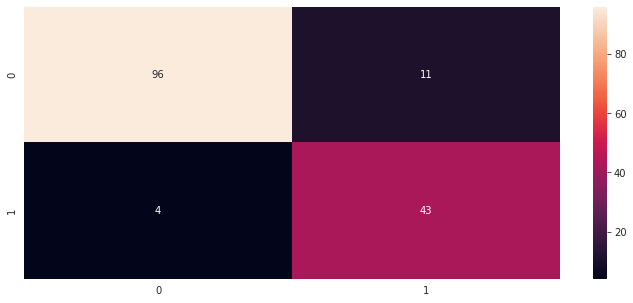

In [1788]:
# Gráfico da confusão de matriz:

plt.figure(figsize = (12, 5))
sns.heatmap(cm, annot = True);

### Teste de modelo de floresta aleatória

In [1789]:
# Importação do modelo de floresta aleatória:

from sklearn.ensemble import RandomForestClassifier

In [1790]:
# Atribuição de modelo à uma variável:

random_forest_classifier = RandomForestClassifier(random_state = 0,
                                                  n_estimators = 10)

In [1791]:
# Treino do modelo de floresta aleatória:

random_forest_classifier.fit(X_train_2, y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

### Teste de acurácia do modelo de floresta aleatória

In [1792]:
# Dados previstos pelo modelo treinado:

y_pred_3 = random_forest_classifier.predict(X_test_2)

In [1793]:
# Acurácia preditiva do modelo treinado:

accuracy_score(y_test, y_pred_3).round(2)

0.9

In [1794]:
# Confusão de matriz:

cm = confusion_matrix(y_test, y_pred_3)

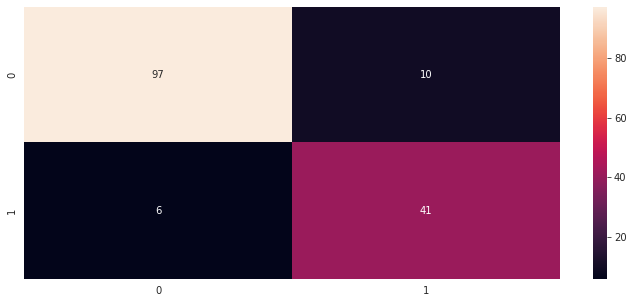

In [1795]:
# Confusão de matriz do modelo treinado:

plt.figure(figsize = (12, 5))
sns.heatmap(cm, annot = True);

### Teste de modelo de Naive Bayes

In [1796]:
# Importação do modelo de Naive Bayes:

from sklearn.naive_bayes import GaussianNB

In [1797]:
# Atribuição de modelo à uma variável:

naive_bayes = GaussianNB()

In [1798]:
# Treino do modelo sobre o conjunto de dados de treino:

naive_bayes.fit(X_train_2, y_train)

GaussianNB()

### Teste de acurácia do modelo de Naive Bayes

In [1799]:
# Dados previstos pelo modelo treinado sobre os dados de teste:

y_pred_4 = naive_bayes.predict(X_test_2)

In [1800]:
# Acurácia preditiva do modelo treinado:

accuracy_score(y_test, y_pred_4).round(2)

0.81

### Teste do modelo de regressão logística

In [1801]:
# Importação do modelo de regressão logística:

from sklearn.linear_model import LogisticRegression

In [1802]:
# Atribuição do modelo à uma variável:

log_reg = LogisticRegression(random_state = 0)

In [1803]:
# Treino do modelo sobre o conjunto de dados de treino:

log_reg.fit(X_train_2, y_train)

LogisticRegression(random_state=0)

### Teste de acurácia do modelo de Regressão Logística

In [1804]:
# Dados previstos pelo modelo:

y_pred_5 = log_reg.predict(X_test_2)

In [1805]:
# Acurácia preditiva do modelo:

accuracy_score(y_test, y_pred_5).round(2)

0.81

### Teste do modelo de SVM

In [1806]:
# Importação do modelo de SVM:

from sklearn.svm import SVC

In [1807]:
# Atribuição do modelo de SVM à uma variável:

svm = SVC(kernel = 'linear', random_state = 0)

In [1808]:
# Treino do modelo de SVM sobre o conjunto de dados de treino:

svm.fit(X_train_2, y_train)

SVC(kernel='linear', random_state=0)

### Teste de acurácia do modelo de SVM

In [1809]:
# Dados previsto pelo modelo de SVM:

y_pred_6 = svm.predict(X_test_2)

In [1810]:
# Acurácia preditiva do modelo de SVM:

accuracy_score(y_test, y_pred_6).round(2)

0.81

### Teste do modelo de Kernel SVM

In [1811]:
# Atribuição do modelo de kernel SVM à uma variável:

kernel_svm = SVC(kernel = 'rbf', random_state = 0)

In [1812]:
# Treino do modelo:

kernel_svm.fit(X_train_2, y_train)

SVC(random_state=0)

### Teste de acurácia do modelo de Kernel SVM

In [1813]:
# Dados previstos pelo modelo:

y_pred_7 = kernel_svm.predict(X_test_2)

In [1814]:
# Acurácia preditiva do modelo:

accuracy_score(y_test, y_pred_7).round(2)

0.84

### K-Fold Cross Validation

In [1815]:
# Importação do método de Validação cruzada, para vermos qual desses modelos em média é o mais preditivamente acurado: 

from sklearn.model_selection import cross_val_score

In [1816]:
# Média de pontuação de acurácia do modelo de regressão logística:

cross_val_score(LogisticRegression(), X, y).mean().round(2)

0.78

In [1828]:
# Média de pontuação de acurácia do modelo de árvore de decisão:

cross_val_score(DecisionTreeClassifier(), X, y).mean().round(2)

0.85

In [1827]:
# Média de pontuação de acurácia do modelo de floresta aleatória:

cross_val_score(RandomForestClassifier(n_estimators = 200, random_state = 0), X, y).mean().round(2)

0.89

In [1819]:
# Média de pontuação de acurácia do modelo de KNeighbors:

cross_val_score(KNeighborsClassifier(), X, y).mean().round(2)

0.86

In [1820]:
# Média de pontuação de acurácia do modelo de Naive Bayes:

cross_val_score(GaussianNB(), X, y).mean().round(2)

0.78

In [1821]:
# Média de pontuação de acurácia do modelo de SVM:

cross_val_score(SVC(kernel = 'linear', random_state = 0), X, y).mean().round(2)

0.78

In [1822]:
# Média de pontuação de acurácia do modelo de Kernel SVM:

cross_val_score(SVC(kernel = 'rbf', random_state = 0), X, y).mean().round(2)

0.84

### Hyperparameter Tuning (GridSearch CV)

---



In [1823]:
# Importação do método para ajusre de hiperparâmetros:

from sklearn.model_selection import GridSearchCV

In [1824]:
# Modelos e parâmetros que serão testados em cada modelo:

model_params = {
    'random_forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [10, 50, 100, 150, 200]
        }
    },
    'decision_tree_classifier': {
        'model': DecisionTreeClassifier(),
        'params': {'criterion': ['gini', 'entropy']
            
        }
    }
}

In [1825]:
# Loop para termos uma lista com os melhores modelos com às melhores pontuações de acurácia preditiva,
# e com os melhores parâmetros:

scores = []

for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv = 5, return_train_score = False)
    clf.fit(X, y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

In [1829]:
# Tabela com os melhores modelos, às melhores pontuações de acurácia preditiva,
# e com os melhores parâmetros:

pd.DataFrame(scores).round(2)

,model,best_score,best_params
0,random_forest,0.89,{'n_estimators': 100}
1,decision_tree_classifier,0.86,{'criterion': 'entropy'}


### FIM